# TRAFFIC PREDICTION

dataset : https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset?select=TrafficTwoMonth.csv

https://drive.google.com/file/d/1GQXicKGUyhLFTb1Cna625PGO8hJ9tOto/view?usp=sharing

Objective : It Helps to identity congested areas, helps to identity which areas that we need to improve, signal adjustment like when
adjusting traffic light time, and lane adjustment

importing necessary packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy
from sklearn import metrics

read dataset

In [ ]:
data=pd.read_csv('/content/TrafficTwoMonth.csv')

In [ ]:
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [ ]:
data.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal
5951,11:45:00 PM,9,Thursday,14,3,1,15,33,low


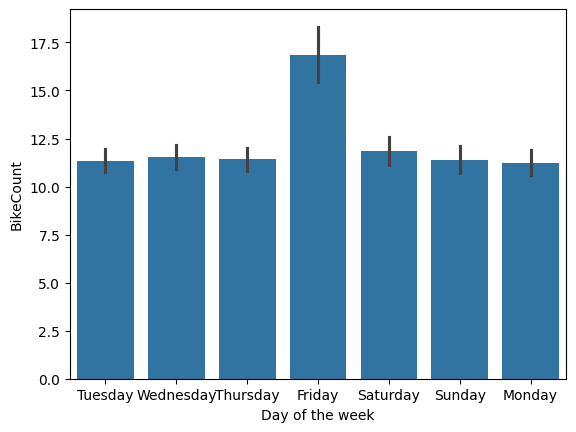

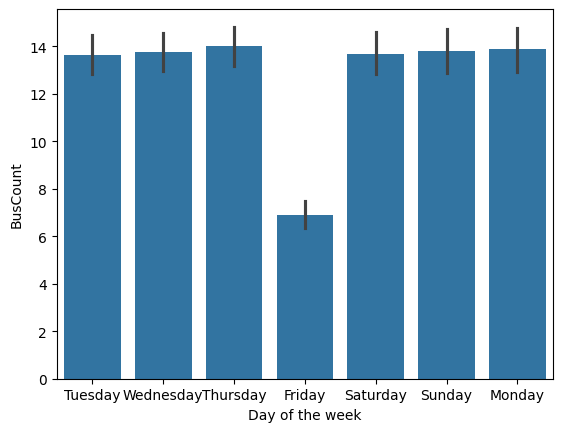

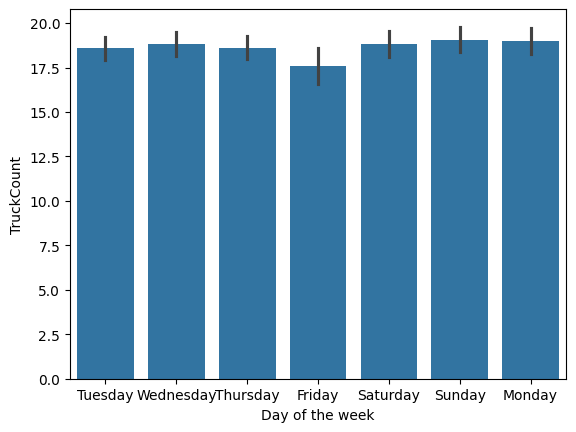

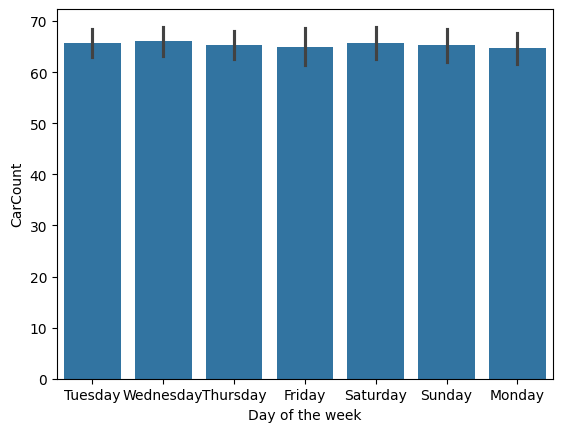

In [ ]:
l=['BikeCount','BusCount','TruckCount','CarCount']
for i in l:
    sns.barplot(x='Day of the week', y=data[i], data=data)
    plt.show()

In [ ]:
count = data['Traffic Situation'].unique().size
count

4

In [ ]:
dict={'low':0,'normal':0,'heavy':0,'high':0}

In [ ]:
ls=data['Traffic Situation'].unique()
dict={}
for j in ls:
    dict[j]=0
for i in data['Traffic Situation']:
    if i in dict:
        dict[i]=dict.get(i)+1

In [ ]:
dict

{'normal': 3610, 'low': 834, 'heavy': 1137, 'high': 371}

In [ ]:
dict.keys()

dict_keys(['normal', 'low', 'heavy', 'high'])

([<matplotlib.patches.Wedge at 0x7c72270b1870>,
 [Text(-0.36127072143631445, 1.038981937202416, 'normal'),
  Text(-0.489639552765241, -0.9850142681036935, 'low'),
  Text(0.6019242726266768, -0.9206992831662498, 'heavy'),
  Text(1.0789769081284737, -0.21402997856730166, 'high')],
 [Text(-0.19705675714708057, 0.5667174202922268, '60.7%'),
  Text(-0.26707611969013145, -0.5372805098747419, '14.0%'),
  Text(0.32832233052364185, -0.5021996089997726, '19.1%'),
  Text(0.5885328589791674, -0.11674362467307361, '6.2%')])

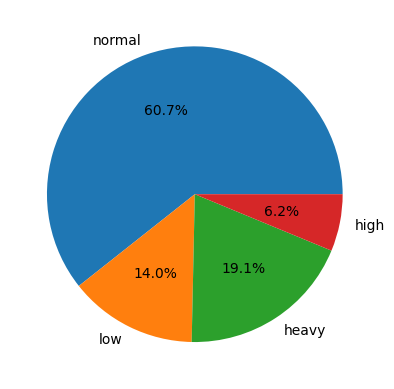

In [ ]:
# Data
labels = dict.keys()
value = dict.values()

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, autopct = '%1.1f%%')
# plt.show()

Split time column to hour,minutes,and seconds and AM/PM using split method with condition if we encounter ':' then split the data.also before
spliting we convert data to string

In [ ]:
data[['hour','minutes','seconds and AM/PM']]=data['Time'].str.split(':',expand=True)

Split new column seconds and AM/PM to seconds and AM/PM using split method with condition if we encounter white space then split

In [ ]:
data[['seconds','AM/PM']]=data['seconds and AM/PM'].str.split(' ',expand=True)

In [ ]:
data.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minutes',
       'seconds and AM/PM', 'seconds', 'AM/PM'],
      dtype='object')

In [ ]:
data=data.drop(columns=['Time','seconds and AM/PM'],axis=1)

In [ ]:
data

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minutes,seconds,AM/PM
0,10,Tuesday,13,2,2,24,41,normal,12,00,00,AM
1,10,Tuesday,14,1,1,36,52,normal,12,15,00,AM
2,10,Tuesday,10,2,2,32,46,normal,12,30,00,AM
3,10,Tuesday,10,2,2,36,50,normal,12,45,00,AM
4,10,Tuesday,11,2,1,34,48,normal,1,00,00,AM
...,...,...,...,...,...,...,...,...,...,...,...,...
5947,9,Thursday,16,3,1,36,56,normal,10,45,00,PM
5948,9,Thursday,11,0,1,30,42,normal,11,00,00,PM
5949,9,Thursday,15,4,1,25,45,normal,11,15,00,PM
5950,9,Thursday,16,5,0,27,48,normal,11,30,00,PM


In [ ]:

data.dtypes

Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
hour                 object
minutes              object
seconds              object
AM/PM                object
dtype: object

In [ ]:
data.isnull().sum()

Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
hour                 0
minutes              0
seconds              0
AM/PM                0
dtype: int64

In [ ]:
data['seconds'].unique()

array(['00'], dtype=object)

drop seconds since it contain only 0

In [ ]:
data=data.drop(columns=['seconds'],axis=1)

In [ ]:
data

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minutes,AM/PM
0,10,Tuesday,13,2,2,24,41,normal,12,00,AM
1,10,Tuesday,14,1,1,36,52,normal,12,15,AM
2,10,Tuesday,10,2,2,32,46,normal,12,30,AM
3,10,Tuesday,10,2,2,36,50,normal,12,45,AM
4,10,Tuesday,11,2,1,34,48,normal,1,00,AM
...,...,...,...,...,...,...,...,...,...,...,...
5947,9,Thursday,16,3,1,36,56,normal,10,45,PM
5948,9,Thursday,11,0,1,30,42,normal,11,00,PM
5949,9,Thursday,15,4,1,25,45,normal,11,15,PM
5950,9,Thursday,16,5,0,27,48,normal,11,30,PM


In [ ]:
data.dtypes

Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
hour                 object
minutes              object
AM/PM                object
dtype: object

convert string columns to int64

In [ ]:
data[['hour','minutes']]=data[['hour','minutes']].astype(str).astype('int64')

In [ ]:
data

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minutes,AM/PM
0,10,Tuesday,13,2,2,24,41,normal,12,0,AM
1,10,Tuesday,14,1,1,36,52,normal,12,15,AM
2,10,Tuesday,10,2,2,32,46,normal,12,30,AM
3,10,Tuesday,10,2,2,36,50,normal,12,45,AM
4,10,Tuesday,11,2,1,34,48,normal,1,0,AM
...,...,...,...,...,...,...,...,...,...,...,...
5947,9,Thursday,16,3,1,36,56,normal,10,45,PM
5948,9,Thursday,11,0,1,30,42,normal,11,0,PM
5949,9,Thursday,15,4,1,25,45,normal,11,15,PM
5950,9,Thursday,16,5,0,27,48,normal,11,30,PM


In [ ]:
data.dtypes

Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
hour                  int64
minutes               int64
AM/PM                object
dtype: object

In [ ]:
label_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtype=='object':
      if i!='Traffic Situation':
        data[i]= label_encoder.fit_transform(data[i])

In [ ]:
data['Traffic Situation']

0       normal
1       normal
2       normal
3       normal
4       normal
         ...  
5947    normal
5948    normal
5949    normal
5950    normal
5951       low
Name: Traffic Situation, Length: 5952, dtype: object

In [ ]:
data['Traffic Situation']=label_encoder.fit_transform(data['Traffic Situation'])

In [ ]:
data['Traffic Situation']

0       3
1       3
2       3
3       3
4       3
       ..
5947    3
5948    3
5949    3
5950    3
5951    2
Name: Traffic Situation, Length: 5952, dtype: int64

display encoded class original name like 2 means low....

In [ ]:
class_name=list(label_encoder.classes_)

In [ ]:
class_name

['heavy', 'high', 'low', 'normal']

checking

In [ ]:
list(label_encoder.inverse_transform([2,1,0,3,1,0,1,1]))

['low', 'high', 'heavy', 'normal', 'high', 'heavy', 'high', 'high']

In [ ]:
data.dtypes

Date                 int64
Day of the week      int64
CarCount             int64
BikeCount            int64
BusCount             int64
TruckCount           int64
Total                int64
Traffic Situation    int64
hour                 int64
minutes              int64
AM/PM                int64
dtype: object

In [ ]:

data.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minutes,AM/PM
0,10,5,13,2,2,24,41,3,12,0,0
1,10,5,14,1,1,36,52,3,12,15,0
2,10,5,10,2,2,32,46,3,12,30,0
3,10,5,10,2,2,36,50,3,12,45,0
4,10,5,11,2,1,34,48,3,1,0,0


In [ ]:
data.columns

Index(['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minutes', 'AM/PM'],
      dtype='object')

In [ ]:
x=data[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount','TruckCount', 'Total', 'hour', 'minutes', 'AM/PM']]

In [ ]:
y=data['Traffic Situation']


In [ ]:
y.unique()

array([3, 2, 0, 1])

In [ ]:
#checking each unique value count
value_counts = y.value_counts()
value_counts

3    3610
0    1137
2     834
1     371
Name: Traffic Situation, dtype: int64

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
#over sampling data
over_sample = SMOTE()
x_smote,y_smote = over_sample.fit_resample(x,y)


In [ ]:
value_counts=y_smote.value_counts()
value_counts

3    3610
2    3610
0    3610
1    3610
Name: Traffic Situation, dtype: int64

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42)

In [ ]:
train_x

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,hour,minutes,AM/PM
1340,23,1,14,2,2,28,46,11,0,1
831,18,6,145,14,35,10,204,3,45,1
5198,2,4,17,5,1,15,38,3,30,0
1456,25,6,60,3,6,23,92,4,0,0
1769,28,2,30,6,26,18,80,10,15,0
...,...,...,...,...,...,...,...,...,...,...
3772,18,6,141,15,21,5,182,7,0,0
5191,2,4,11,0,0,16,27,1,45,0
5226,2,4,77,23,14,20,134,10,30,0
5390,4,2,19,5,1,38,63,3,30,0


In [ ]:
train_y

1340    3
831     0
5198    2
1456    3
1769    3
       ..
3772    0
5191    2
5226    3
5390    3
860     3
Name: Traffic Situation, Length: 4464, dtype: int64

In [ ]:
logistic_model=LogisticRegression()
logistic_model.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logistic_predict=logistic_model.predict(test_x)

In [ ]:
accuracy_score(logistic_predict,test_y)

0.782258064516129

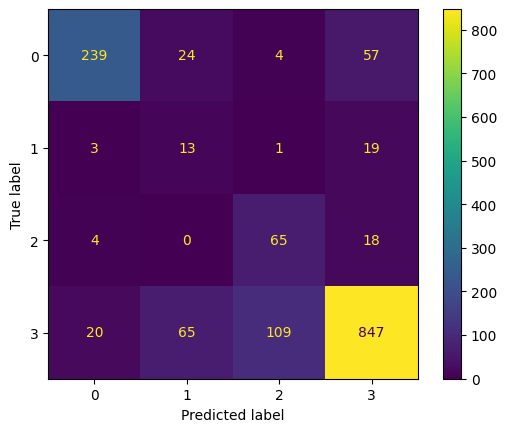

In [ ]:
confusion_matrix = metrics.confusion_matrix(logistic_predict,test_y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(logistic_predict,test_y))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       324
           1       0.13      0.36      0.19        36
           2       0.36      0.75      0.49        87
           3       0.90      0.81      0.85      1041

    accuracy                           0.78      1488
   macro avg       0.57      0.66      0.59      1488
weighted avg       0.85      0.78      0.81      1488



In [ ]:
decision_model=DecisionTreeClassifier()
decision_model.fit(train_x,train_y)

DecisionTreeClassifier()

In [ ]:
decision_predict=decision_model.predict(test_x)

In [ ]:
accuracy_score(decision_predict,test_y)

0.9986559139784946

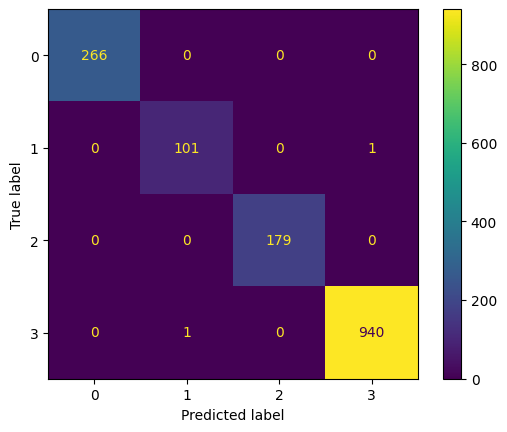

In [ ]:
confusion_matrix = metrics.confusion_matrix(decision_predict,test_y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(decision_predict,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       0.99      0.99      0.99       102
           2       1.00      1.00      1.00       179
           3       1.00      1.00      1.00       941

    accuracy                           1.00      1488
   macro avg       1.00      1.00      1.00      1488
weighted avg       1.00      1.00      1.00      1488



In [ ]:
naive_model=GaussianNB()
naive_model.fit(train_x,train_y)

GaussianNB()

In [ ]:
random_predict=naive_model.predict(test_x)

In [ ]:
accuracy_score(random_predict,test_y)

0.7963709677419355

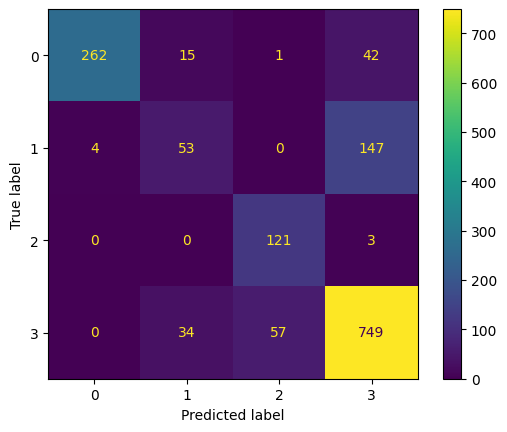

In [ ]:
confusion_matrix = metrics.confusion_matrix(random_predict,test_y)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
print(classification_report(random_predict,test_y))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       320
           1       0.52      0.26      0.35       204
           2       0.68      0.98      0.80       124
           3       0.80      0.89      0.84       840

    accuracy                           0.80      1488
   macro avg       0.74      0.74      0.72      1488
weighted avg       0.79      0.80      0.78      1488



In [ ]:
just=test_x.iloc[1]

In [ ]:
just

Date                23
Day of the week      1
CarCount           117
BikeCount           10
BusCount            10
TruckCount          18
Total              155
hour                 5
minutes             45
AM/PM                0
Name: 4247, dtype: int64

In [ ]:
ele

array([ 23,   1, 117,  10,  10,  18, 155,   5,  45,   0])

In [ ]:
ele=just.values

In [ ]:
ele.ndim

1

In [ ]:
fu=ele.reshape(1,10)

In [ ]:
fu

array([[ 23,   1, 117,  10,  10,  18, 155,   5,  45,   0]])

In [ ]:
tester=naive_model.predict(fu)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
tester

array([3])

convert tested value to its class name

In [ ]:
list(label_encoder.inverse_transform([tester]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['normal']